# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: **Nima Kelidari**
2.   Student Number: **98108124**


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Deep_learning/HW1

/content/gdrive/MyDrive/Deep_learning/HW1


In [ ]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])
artists

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
...,...,...
17627,18741,Diamanda Galás
17628,18742,Aya RL
17629,18743,Coptic Rain
17630,18744,Oz Alchemist


# Preprocessing (20 pts)

In [ ]:


ap = pd.merge(plays, artists,   left_on='artistID', 
  right_on='id')

ap = ap.sort_values(by = ["id","userID"])
ap = ap.reset_index(drop=True)[['id',"name","userID","artistID","weight"]]


In [ ]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap_withoutID = ap.drop(labels=['id'],axis = 1)
ap_withoutID = ap_withoutID.reset_index(drop=False)
ap_withoutID

,index,name,userID,artistID,playCount
0,0,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,2,MALICE MIZER,785,1,76
3,3,Diary of Dreams,135,2,1021
4,4,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,92829,Diamanda Galás,454,18741,301
92830,92830,Aya RL,454,18742,294
92831,92831,Coptic Rain,454,18743,287
92832,92832,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################
artistID = 0
my_artists = []
uniqueUsers = []
totalArtistPlays = []

for index,user in ap.iterrows():
  
  if user['artistID'] != artistID :
    my_artists.append(user['name'])
    uniqueUsers.append(1)
    totalArtistPlays.append(user['playCount'])
    artistID = user['artistID']
  else:
    uniqueUsers[-1]+=1
    totalArtistPlays[-1]+=user['playCount']

avgUserPlays = [(totalArtistPlays[i]/uniqueUsers[i]) for i in range(len(totalArtistPlays))]

artist_rank = pd.DataFrame({'name': my_artists,
                            'totalUniqueUsers': uniqueUsers,
                            'totalArtistPlays': totalArtistPlays, 
                            'avgUserPlays': avgUserPlays})
artist_rank = artist_rank.sort_values(by = "totalArtistPlays",ascending=False)
artist_rank = artist_rank.set_index('name')


In [ ]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
K-Precise,1,1,1.000000
ZÜNDER,1,1,1.000000
Evil Masquerade,1,1,1.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################


ap = pd.merge(ap, artist_rank,   left_on='name', right_on='name')
ap = ap.sort_values(by = "playCount",ascending=False)

In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [ ]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


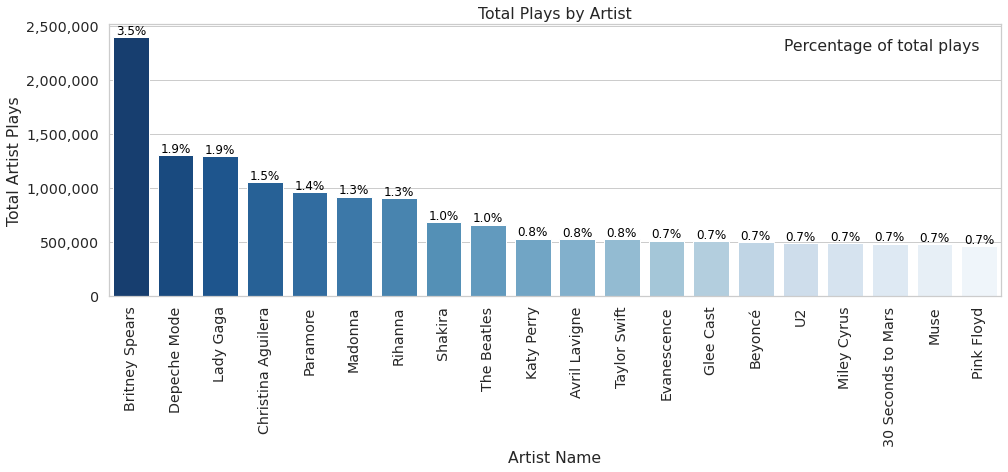

In [ ]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


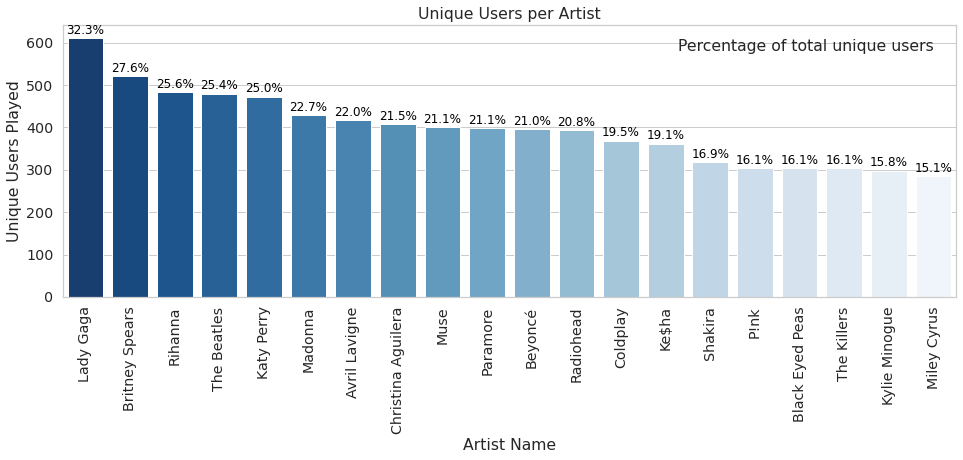

In [ ]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


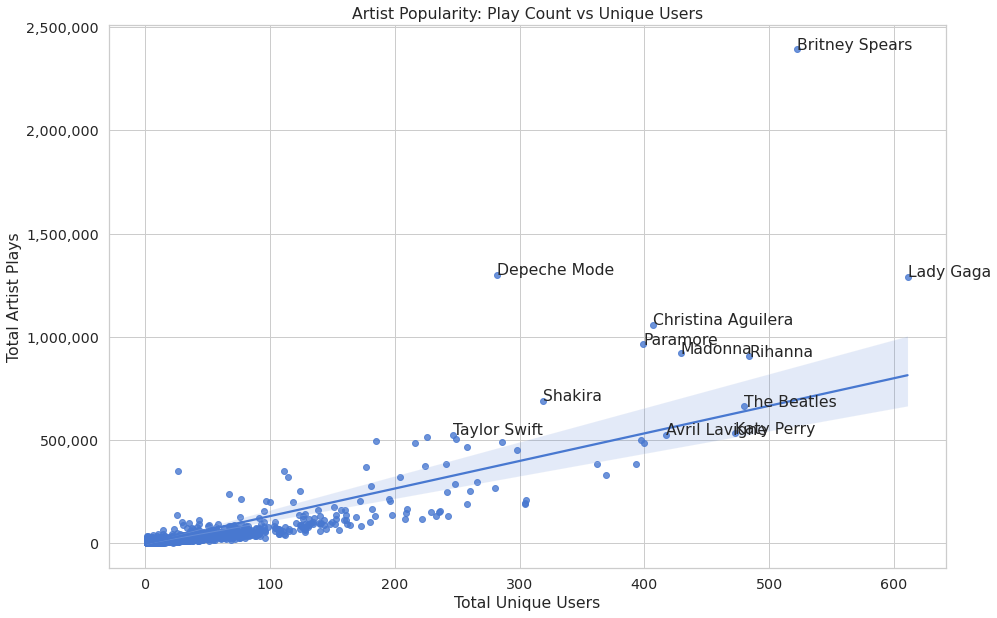

In [ ]:
top_artists =  artist_rank.index[:12]

x = artist_rank['totalUniqueUsers']
y =  artist_rank['totalArtistPlays']
labels =  artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [ ]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,792,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,511,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,203,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,498,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
38688,913,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,697,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,4988,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,17080,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
len_users = 0
temp_users = []
temp_artists = []

for index,user in ap.iterrows():
  if not user['userID'] in temp_users :
    temp_users.append(user['userID'])
    len_users+=1
  if not user['artistID'] in temp_artists :
    temp_artists.append(user['artistID'])


len_artists = len(temp_artists)

user_map = [0 for i in range (len_users)]
artist_map = [0 for i in range (len_artists)]

users_array = np.sort(np.array(temp_users))
artists_list = list(np.sort(np.array(temp_artists)))

play_table = np.array([[np.nan for x in range(len_artists+1)] for y in range(len_users)])

user_mapper = np.array([-1 for i in range(max(temp_users)+1)])
print ('users:',max(temp_users))
counter = 0
for index in users_array:
  user_mapper[index] = counter
  counter += 1

artist_mapper = np.array([-1 for i in range(max(temp_artists)+1)])
print ('artists:',max(temp_artists))
counter = 0
for index in artists_list:
  artist_mapper[index] = counter
  counter += 1

artists_list = ['userID'] + artists_list


for index,user in ap.iterrows():
  play_table[user_mapper[user['userID']],artist_mapper[user['artistID']]] = user['playCountScaled']

ratings_df = pd.DataFrame(play_table, columns =artists_list) 
ratings_df = ratings_df.assign(userID=users_array)
ratings_df = ratings_df.set_index('userID')



users: 2100
artists: 18745


In [ ]:
ratings_df

,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
rating_zeros = ratings_df.fillna(0)
ratings = rating_zeros.to_numpy()

In [ ]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

non_zeros = np.count_nonzero(ratings)
sparsity = 100*non_zeros/(ratings.shape[0]*ratings.shape[1])
print ('percentage of sparsity:',sparsity,'%')

## END

percentage of sparsity: 0.27636602966737395 %


# Fitting(Training) Model (50pts)

In [ ]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 18000

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################




def train_test_split(ratings):
  w = ratings.shape[0]
  h = ratings.shape[1]
  train_nonzeros = ratings.copy()


  for i in range (h):
    if 0<np.count_nonzero(train_nonzeros[:,i])< MIN_USER_RATINGS:
      train_nonzeros[:,i] = np.zeros((w))



  traint_nonzero_list = train_nonzeros.reshape(w*h)
  traint_list = ratings.reshape(w*h)
  n_zeros = np.nonzero(traint_nonzero_list)[0]

  sample = np.random.choice(len(n_zeros),DELETE_RATING_COUNT, replace=False)
  indexes = n_zeros[sample]

  validation_list = np.zeros((w*h))
  validation_list[indexes]= traint_nonzero_list[indexes]

  validation = validation_list.reshape(w,h)

  traint_list[indexes]= np.zeros((len(indexes)))

  train = traint_list.reshape(w,h)

  return train,validation

In [ ]:
train, val = train_test_split(ratings)

In [ ]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    mean_squared_error = np.sum((prediction - ground_truth)**2)
    return np.sqrt(mean_squared_error)

In [ ]:

class Recommender:
  
  def __init__(self, n_epochs=100, n_latent_features=100, lmbda=1, learning_rate=0.1):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    self.predicted_matrix = np.array([])
  
  def predictions(self, P, Q):
    pre_matrix = Q @ P
    return pre_matrix
  
  def fit(self, X_train, X_val):
    P = np.random.normal(0.2, 0.05, (self.n_latent_features,X_train.shape[1]))
    Q = np.random.normal(0.2, 0.05, (X_train.shape[0],self.n_latent_features))

    train_count = (np.count_nonzero(X_train))
    val_count = (np.count_nonzero(X_val))

    from tqdm import tqdm
    for epoch in tqdm(range (self.n_epochs)):
      train_error = 0
      val_error = 0
      stat_p = P.copy()
      stat_q = Q.copy()
      c = 0
      for i in range(stat_p.shape[1]):
        for j in range(stat_q.shape[0]):
          if (X_train[j,i]!=0):
            c+=1
            p = stat_p[:,i]
            q = np.transpose(stat_q[j,:])
            e = X_train[j,i]-(p@q)
            train_error += e**2
            Q[j,:] = np.transpose(q+self.learning_rate*(e*p - self.lmbda*q))
            P[:,i] = p+self.learning_rate*(e*q - self.lmbda*p)

          elif (X_val[j,i]!=0):
            val_error += (X_val[j,i]-(stat_p[:,i] @ np.transpose(stat_q[j,:])))**2
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
      print(c)
      print('Train Error:',np.sqrt(train_error/train_count))
      print('Validation Error:',np.sqrt(val_error/val_count))
      train_errors.append(np.sqrt(train_error/train_count))
      val_errors.append(np.sqrt(val_error/val_count))
    
    
    self.predicted_matrix = self.predictions(P,Q)
    
    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    output = []
    for i,u in enumerate(X_train[user_index]):
      if u==0:
        output.append(self.predicted_matrix[user_index,i])
    return np.array(output)

In [ ]:
#creating recommender object
train_errors = []
val_errors = []
epochs = 30
recommender = Recommender(n_epochs=epochs).fit(train, val)

  3%|▎         | 1/30 [00:27<13:30, 27.96s/it]

74195
Train Error: 4.002495435465119
Validation Error: 4.00298145858615


  7%|▋         | 2/30 [00:58<13:42, 29.37s/it]

74195
Train Error: 0.9794818288315532
Validation Error: 1.0011839652921348


 10%|█         | 3/30 [01:23<12:18, 27.36s/it]

74195
Train Error: 0.6384669116935034
Validation Error: 0.6613941179799611


 13%|█▎        | 4/30 [01:50<11:52, 27.39s/it]

74195
Train Error: 0.45245647773944925
Validation Error: 0.4737470565076039


 17%|█▋        | 5/30 [02:15<11:04, 26.59s/it]

74195
Train Error: 0.33477600778562844
Validation Error: 0.3535055587611617


 20%|██        | 6/30 [02:42<10:41, 26.72s/it]

74195
Train Error: 0.2541941675103021
Validation Error: 0.2702193664549181


 23%|██▎       | 7/30 [03:09<10:14, 26.72s/it]

74195
Train Error: 0.19626749443138736
Validation Error: 0.2097797913742122


 27%|██▋       | 8/30 [03:34<09:34, 26.11s/it]

74195
Train Error: 0.15327316527037071
Validation Error: 0.16459561350560453


 30%|███       | 9/30 [04:01<09:13, 26.34s/it]

74195
Train Error: 0.12065515003653693
Validation Error: 0.1301477647312447


 33%|███▎      | 10/30 [04:26<08:37, 25.89s/it]

74195
Train Error: 0.09552639170904133
Validation Error: 0.1035437990353674


 37%|███▋      | 11/30 [04:52<08:15, 26.07s/it]

74195
Train Error: 0.0759564531231326
Validation Error: 0.0828312967185805


 40%|████      | 12/30 [05:17<07:40, 25.57s/it]

74195
Train Error: 0.060600713351315345
Validation Error: 0.06663956812125116


 43%|████▎     | 13/30 [05:44<07:22, 26.05s/it]

74195
Train Error: 0.04849302679771466
Validation Error: 0.05397779054780312


 47%|████▋     | 14/30 [06:09<06:55, 25.94s/it]

74195
Train Error: 0.03892273348730907
Validation Error: 0.04411329022149295


 50%|█████     | 15/30 [06:37<06:34, 26.33s/it]

74195
Train Error: 0.03135793446531511
Validation Error: 0.036493007055706864


 53%|█████▎    | 16/30 [07:08<06:27, 27.71s/it]

74195
Train Error: 0.025395395470522168
Validation Error: 0.030689011389673445


 57%|█████▋    | 17/30 [07:35<06:00, 27.77s/it]

74195
Train Error: 0.020726265559729774
Validation Error: 0.026358280611652435


 60%|██████    | 18/30 [08:03<05:31, 27.64s/it]

74195
Train Error: 0.017111231032315693
Validation Error: 0.02321304033507811


 63%|██████▎   | 19/30 [08:28<04:54, 26.81s/it]

74195
Train Error: 0.014361162838201075
Validation Error: 0.021001978507013717


 67%|██████▋   | 20/30 [08:55<04:30, 27.00s/it]

74195
Train Error: 0.012321109337230995
Validation Error: 0.019503091289355845


 70%|███████   | 21/30 [09:22<04:02, 26.94s/it]

74195
Train Error: 0.010857409889406503
Validation Error: 0.018525397982856854


 73%|███████▎  | 22/30 [09:47<03:30, 26.29s/it]

74195
Train Error: 0.009849459173279103
Validation Error: 0.017913176067809858


 77%|███████▋  | 23/30 [10:15<03:08, 26.92s/it]

74195
Train Error: 0.009187594201837897
Validation Error: 0.017547135031621426


 80%|████████  | 24/30 [10:39<02:37, 26.18s/it]

74195
Train Error: 0.008775890100841986
Validation Error: 0.01734102782768691


 83%|████████▎ | 25/30 [11:06<02:12, 26.40s/it]

74195
Train Error: 0.008535958459688698
Validation Error: 0.01723539346153493


 87%|████████▋ | 26/30 [11:32<01:44, 26.24s/it]

74195
Train Error: 0.008408335146392974
Validation Error: 0.017190733605307623


 90%|█████████ | 27/30 [11:58<01:17, 25.95s/it]

74195
Train Error: 0.00835080031243024
Validation Error: 0.01718157174788294


 93%|█████████▎| 28/30 [12:24<00:52, 26.15s/it]

74195
Train Error: 0.008334933011855047
Validation Error: 0.017191886019529107


 97%|█████████▋| 29/30 [12:49<00:25, 25.69s/it]

74195
Train Error: 0.008342389219638927
Validation Error: 0.01721184964395338


100%|██████████| 30/30 [13:16<00:00, 26.54s/it]

74195
Train Error: 0.008361740540649244
Validation Error: 0.017235609207208503


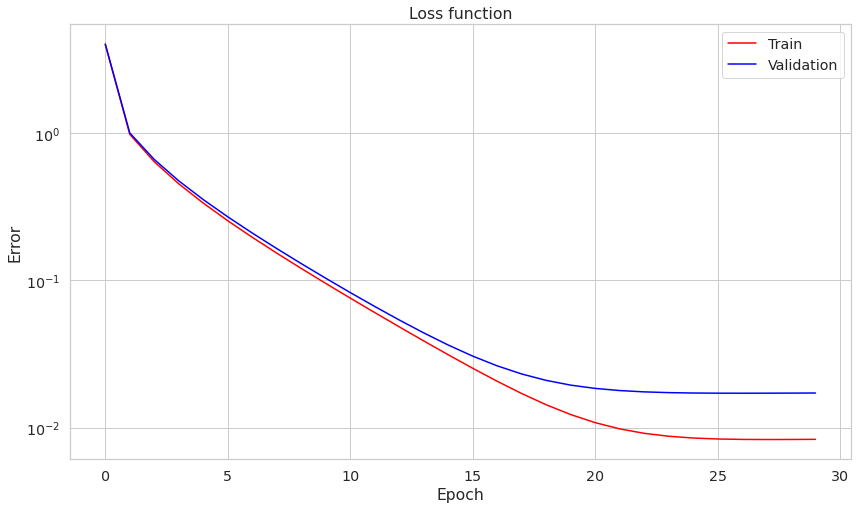

In [94]:
#      DOOOOOOOOOOOOOOOOOOOOOOONT RUN IT   #
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################


x1 = np.array(range(epochs))
y1 = np.array(train_errors)
x2 = np.array(range(epochs))
y2 = np.array(val_errors)

plt.plot(x1, y1, color = 'red')
plt.plot(x2, y2, color = 'blue')
plt.legend(['Train','Validation'])
plt.title('Loss function')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [103]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [104]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  print(artist_ids)
  print(ratings.shape)

  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [105]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])
create_artist_ratings(artists, existing_ratings_index, existing_ratings)

Index([    6,   209,   415,   452,   471,   474,   489,   546,   613,   807,
         811,   853,   855,   952,   977,  1130,  1178,  1400,  1408,  1409,
        1448,  2171,  2365,  2379,  2473,  2478,  2817,  4364,  5153,  5946,
        6255,  6617,  6677,  8346,  8929, 10955, 11020, 13374, 13375, 13376],
      dtype='object')
(40,)


,id,name,rating
0,6,Moonspell,0.196486
1,471,Metro Station,0.052734
2,474,Craig David,0.043204
3,613,John Coltrane,0.042016
4,977,At the Drive-In,0.029742
5,1130,Ludwig van Beethoven,0.029031
6,2171,Integral,0.021690
7,2478,Danny Elfman,0.021562
8,6255,Viewtiful Joe,0.016280
9,6617,Sparks The Rescue,0.010990


In [106]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:

create_artist_ratings(artists, predictions_index, rating_predictions)

Index([    1,     2,     3,     4,     5,     7,     8,     9,    10,    11,
       ...
       18736, 18737, 18738, 18739, 18740, 18741, 18742, 18743, 18744, 18745],
      dtype='object', length=17592)
(17592,)


,id,name,rating
0,7611,AySel & Arash,0.068153
1,7632,Mina/심지환/최지호,0.067615
2,11748,Sore Eros,0.067163
3,13104,zero gravity toilet,0.066994
4,13816,Jel,0.066962
5,14370,Los 007,0.066904
6,15943,Giulia,0.066721
7,16412,Ross and the Wrongens,0.066548
8,17163,Water Charger,0.066467
9,17464,Empty Trash,0.066303


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**